<h3> Section B: Decision Tree and Random Forests (Library Implementation) </h3>

* <b> Import dataset from site and import it in Pandas </b>

In [168]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
df = pd.concat([heart_disease.data.ids, heart_disease.data.features, heart_disease.data.targets], axis=1)

In [169]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [170]:
df.shape

(303, 14)

In [171]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [172]:
df['num'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

* <b> Fill missing values with mean </b>

In [173]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [174]:
# Fill missing values with mean column values
df['ca'].fillna(df['ca'].mean(), inplace=True)
df['thal'].fillna(df['thal'].mean(), inplace=True)

In [175]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

* <b>Exploratory Data Analysis </b>

<Axes: xlabel='num', ylabel='count'>

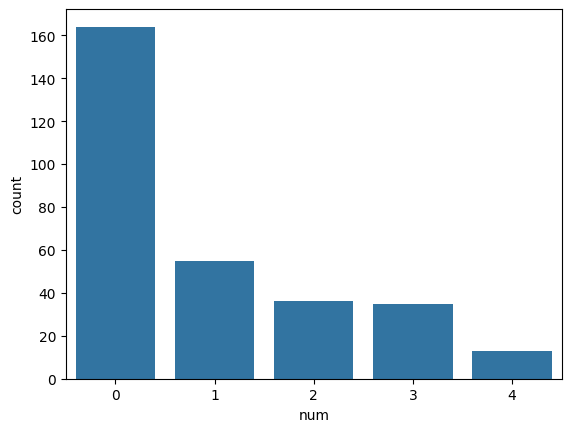

In [176]:
import seaborn as sns
sns.countplot(x = 'num', data = df)

<Axes: xlabel='num', ylabel='count'>

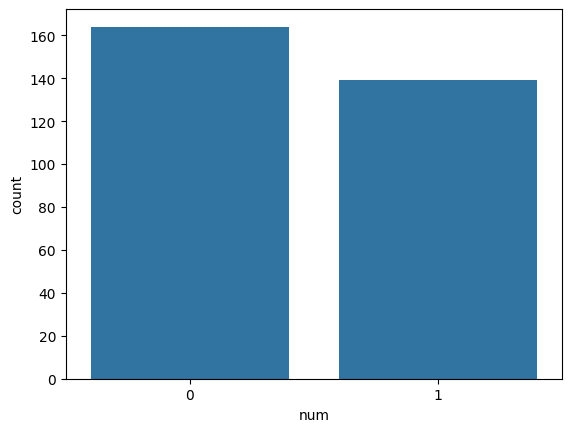

In [177]:
df.loc[df['num'] > 0, 'num'] = 1
sns.countplot(x = 'num', data = df)

In [178]:
df=df.drop_duplicates()

In [179]:
X=df.drop('num',axis=1)
y=df['num']

In [180]:
correlation=df.corr()
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.359489,0.127368,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.092891,0.379300,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.232332,0.264895,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098707,0.133534,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.118525,0.014190,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.143967,0.070658,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.127487,0.024449,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.263408,-0.278530,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.144722,0.328291,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.294558,0.340549,0.424510


<Axes: >

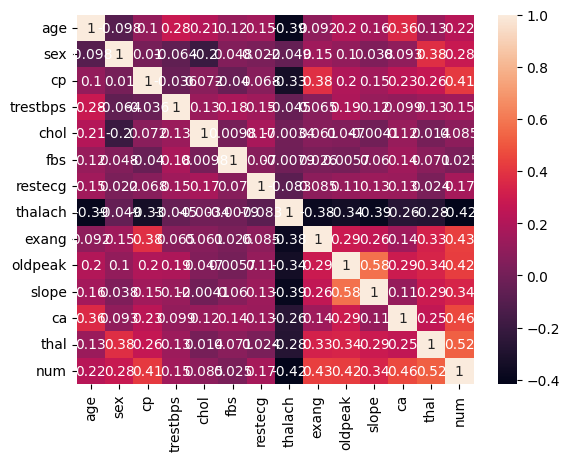

In [181]:
sns.heatmap(correlation, annot=True)

<Figure size 640x480 with 0 Axes>

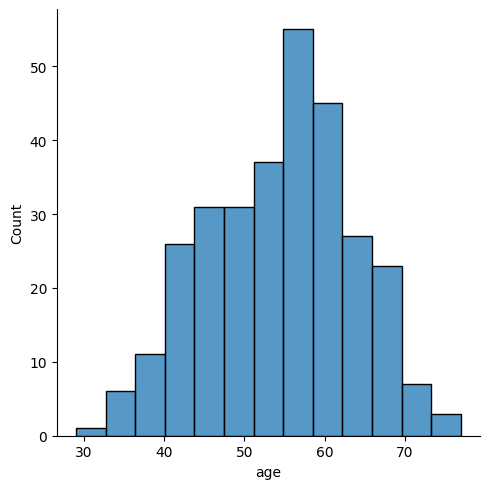

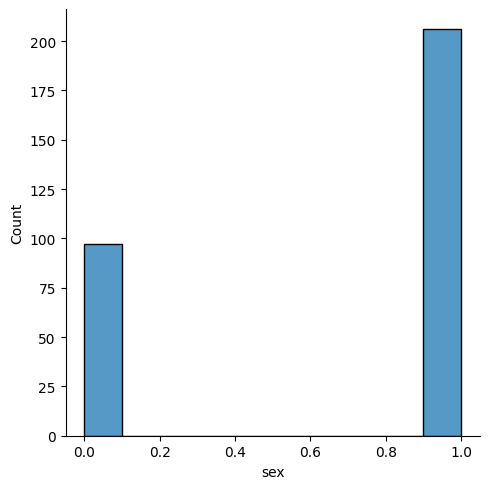

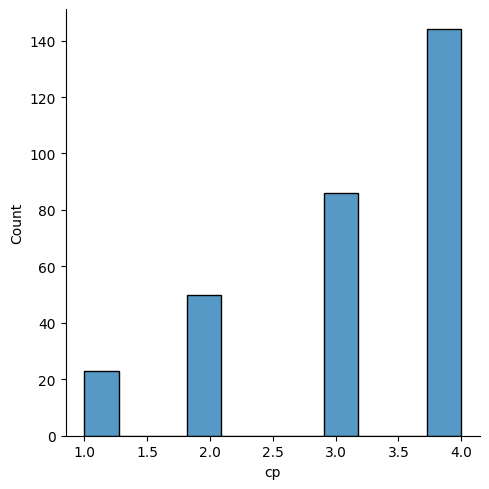

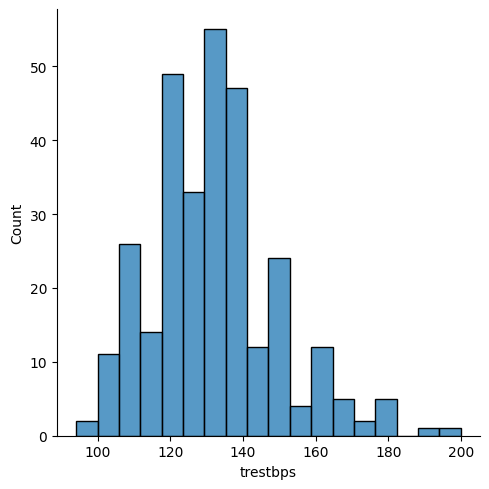

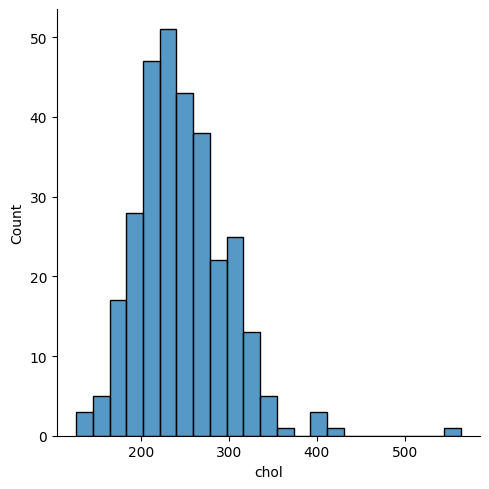

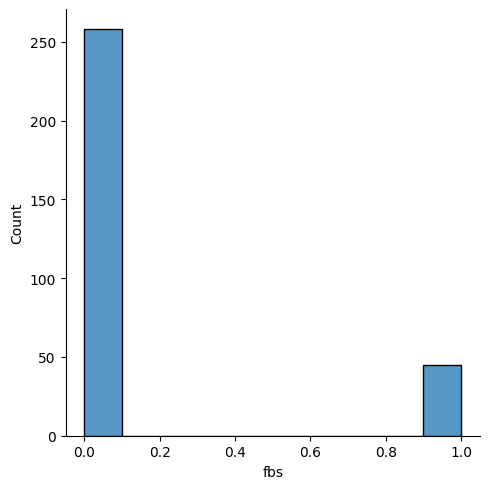

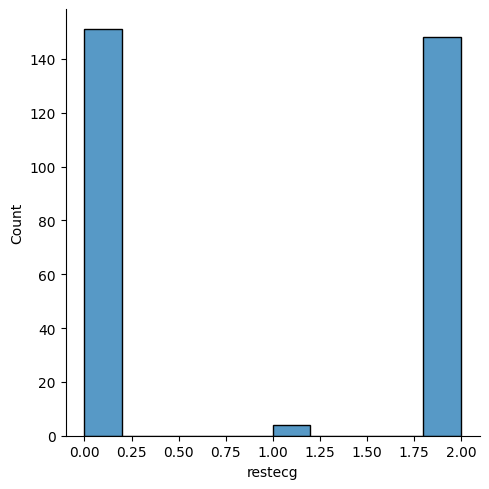

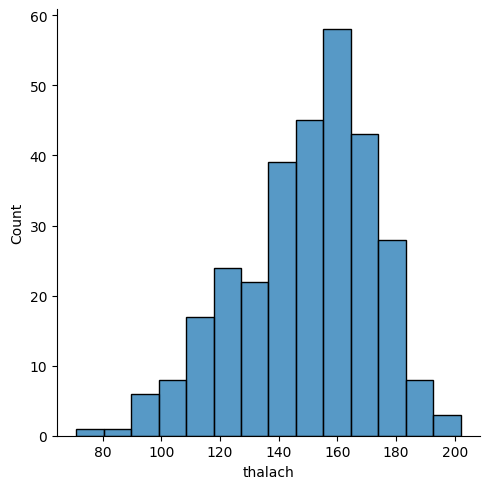

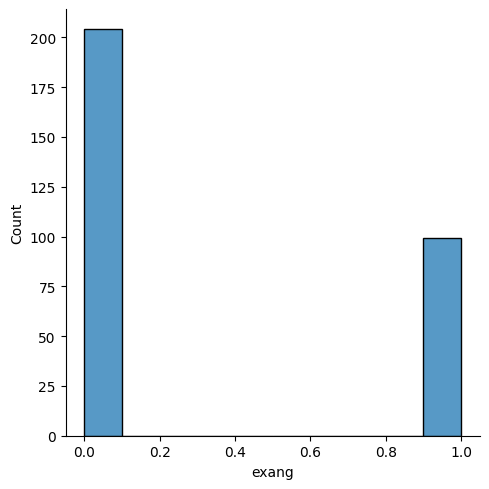

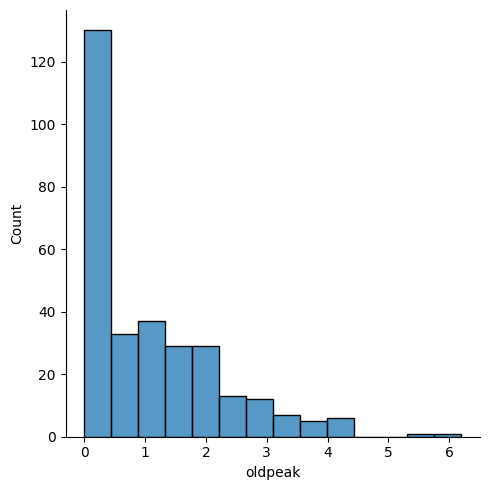

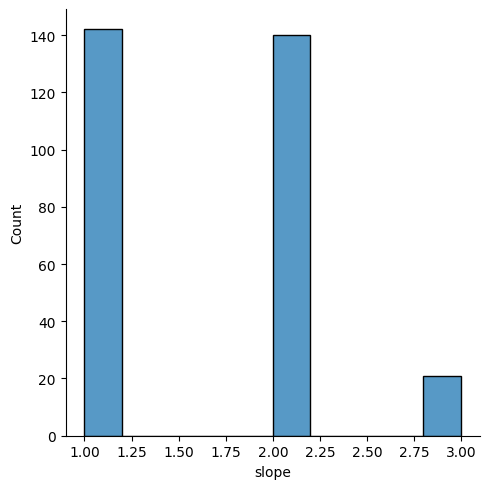

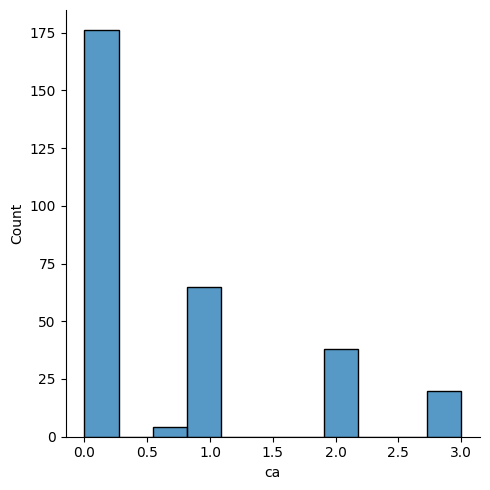

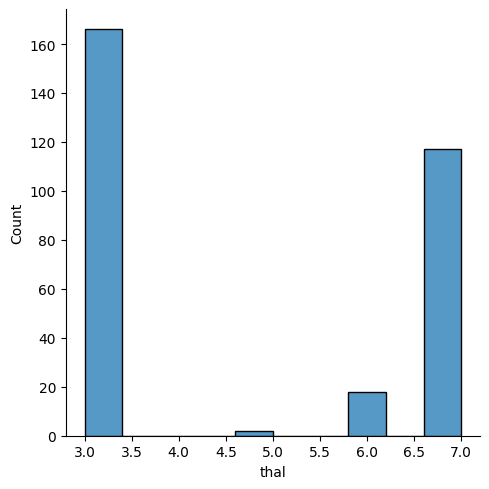

In [182]:
import matplotlib.pyplot as plt
for(i,col) in enumerate(X.columns):
    plt.figure(i)
    sns.displot(X[col])

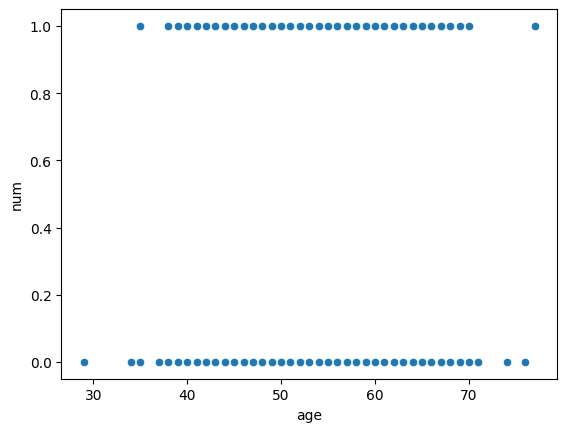

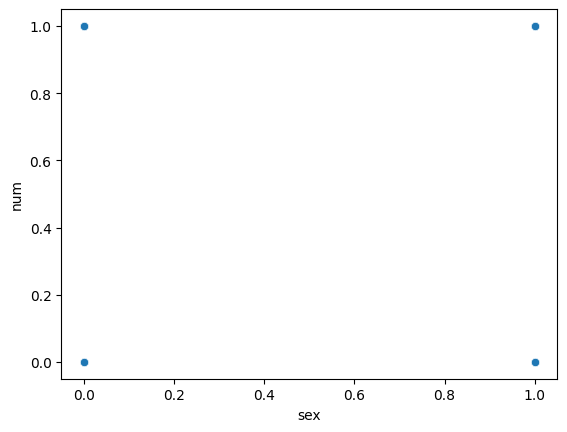

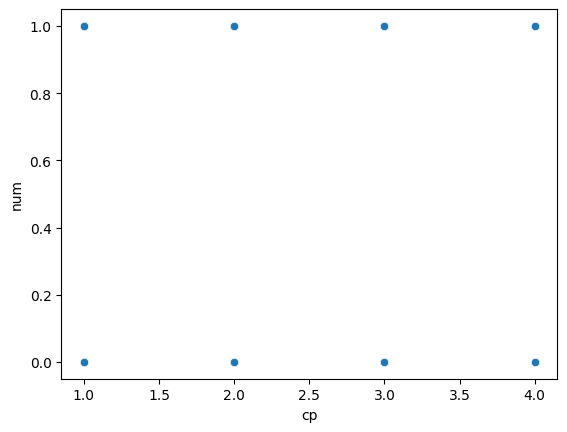

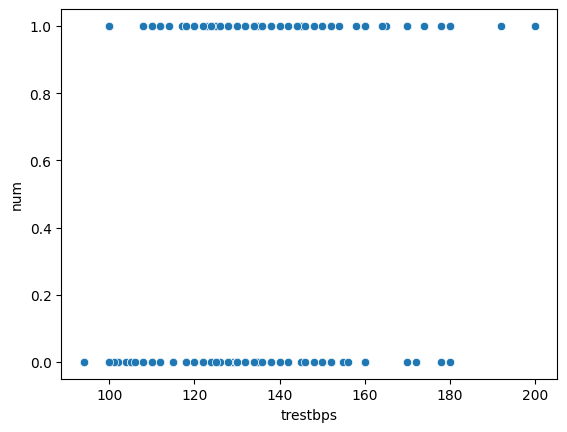

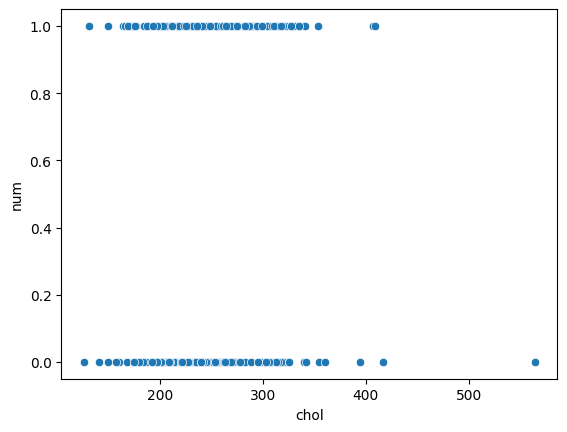

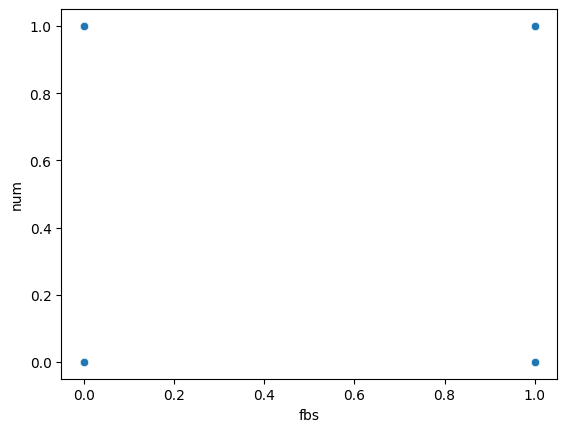

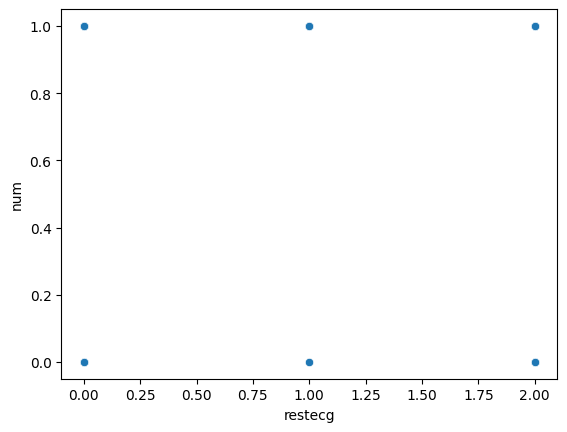

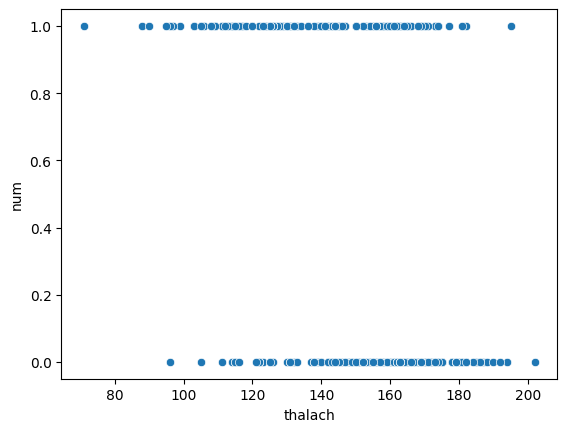

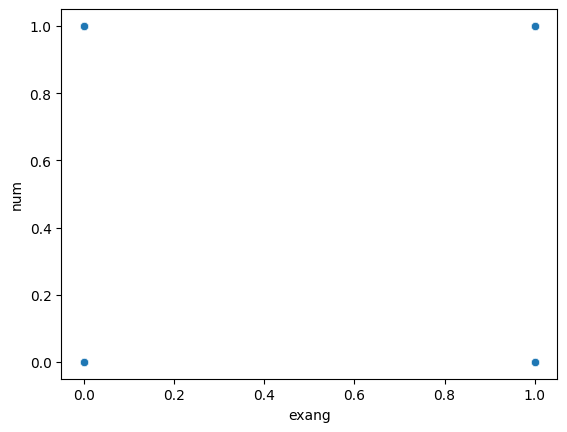

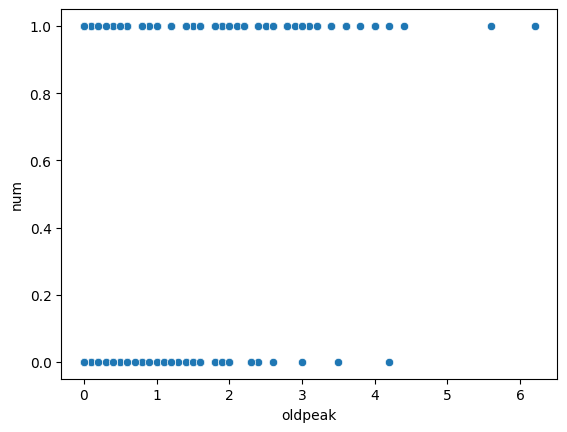

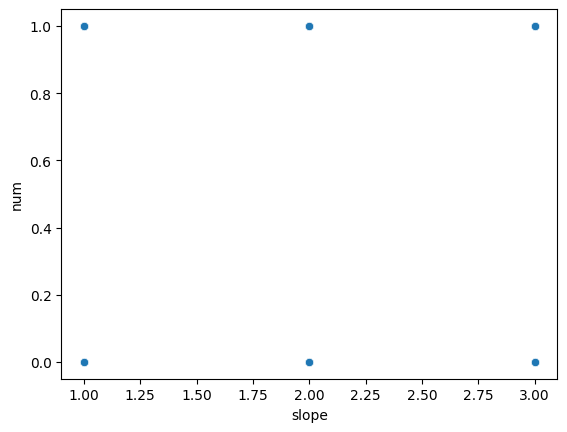

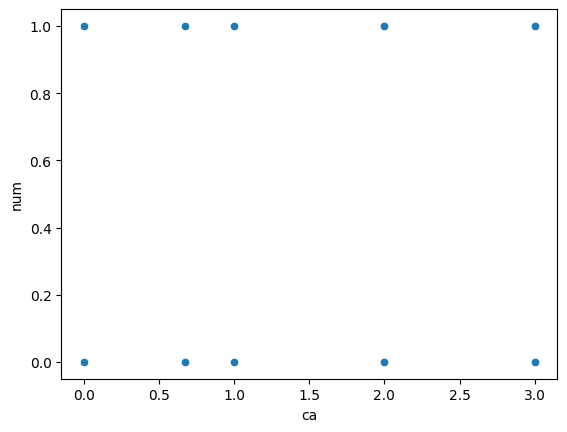

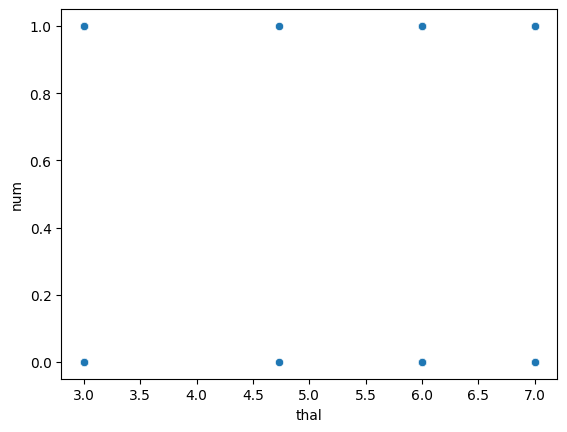

In [183]:
for col in X.columns:
    sns.scatterplot(x=X[col],y=y)
    plt.show()

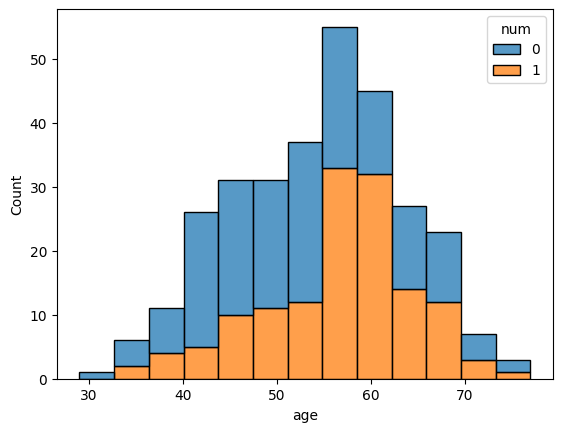

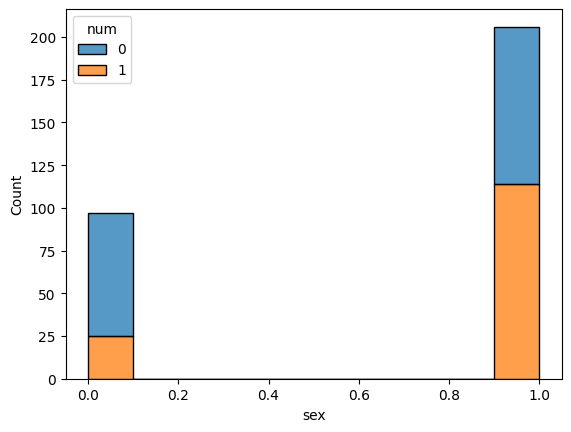

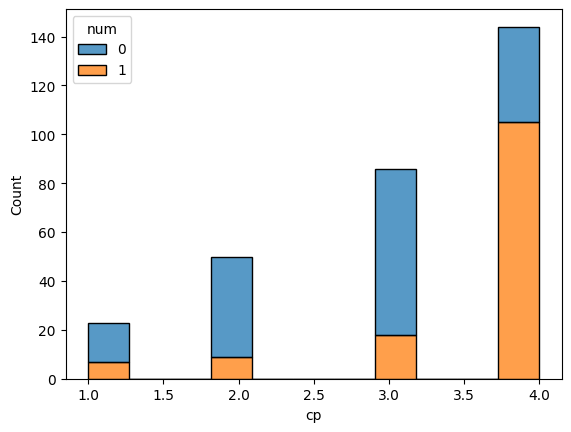

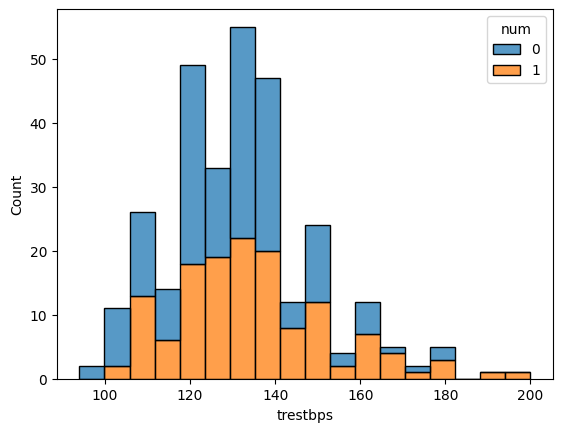

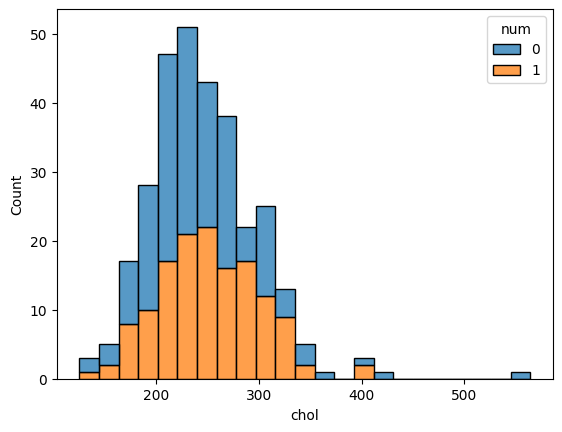

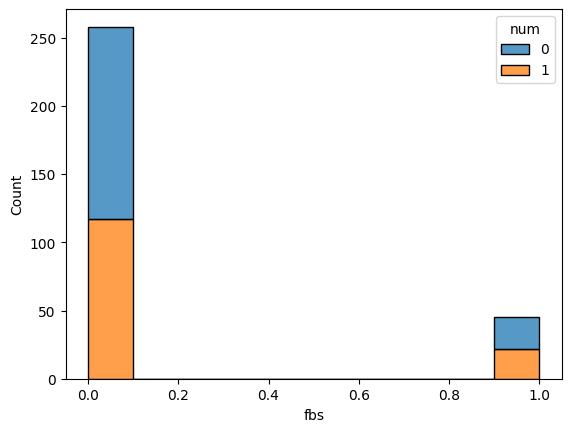

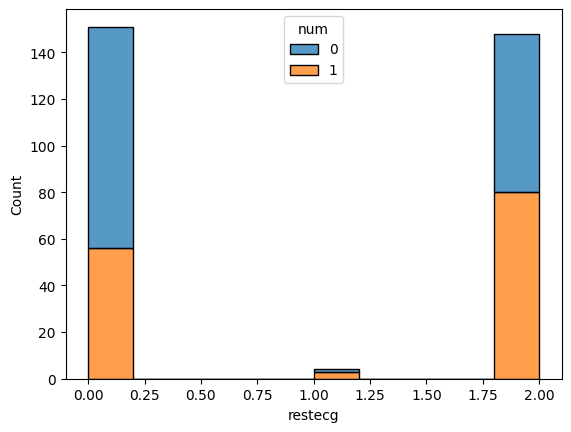

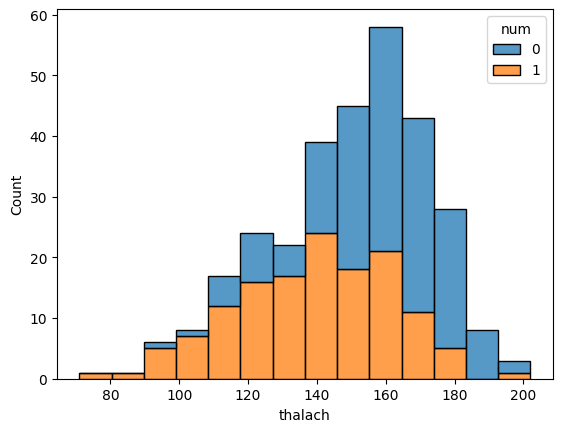

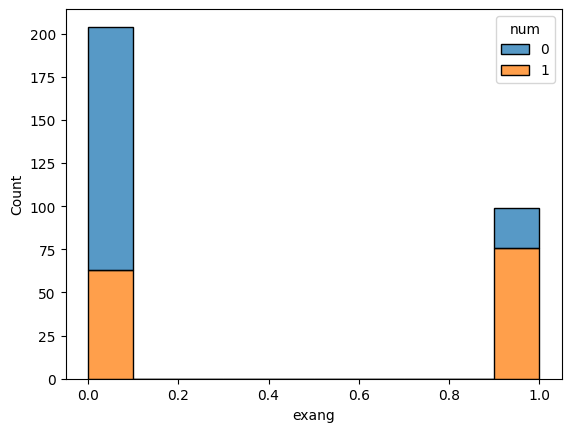

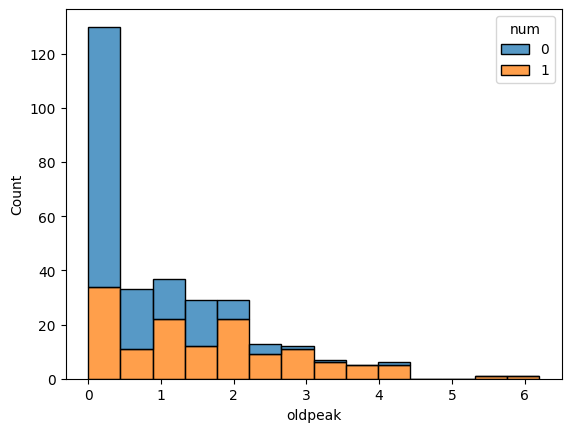

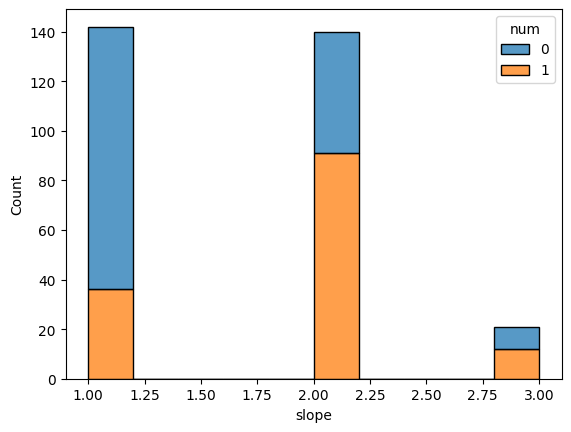

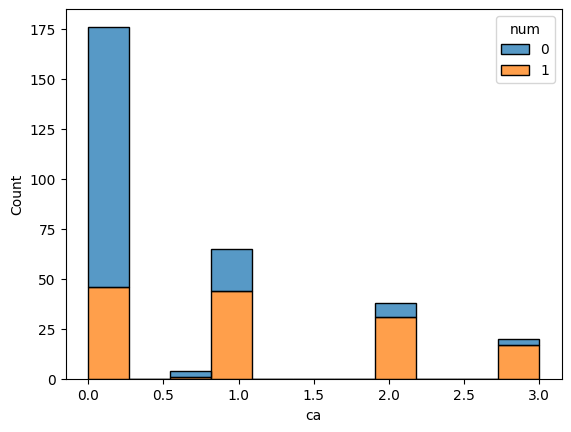

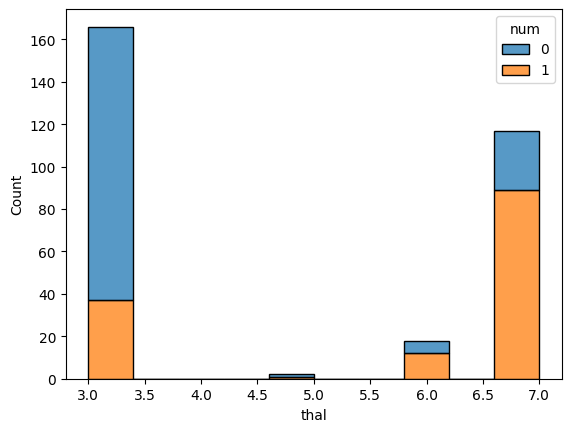

In [184]:
for col in X.columns:
    sns.histplot(data=df, x=col, hue="num", multiple="stack")
    plt.show()

* <b> Split the dataset into train and tests in the ratio 80:20 using sklearn train_test_split <b>

In [185]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# test size = 20% of the data that is 0.2, random state is also fixed to have same results

* <b> Best Attribute Selection based on the accuracy (Entropy Or Gini Impurity) for Decision Tree</b>

In [186]:
from sklearn.tree import DecisionTreeClassifier
best_score = 0
best_criteria = ''
for criterion in ['gini', 'entropy']:
    clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
    clf.fit(X_train, y_train)
    score=clf.score(X_test, y_test)
    print(f"Accuracy for {criterion}: {score}")
    if(score > best_score):
        best_score = score
        best_criteria = criterion
print("Best accuracy:" + str(best_score) + "for " + str(best_criteria))

Accuracy for gini: 0.7540983606557377
Accuracy for entropy: 0.819672131147541
Best accuracy:0.819672131147541for entropy


* <b> Select the best combination of the hyperparameters using the
test data scores.(For the parameters min_samples_split and max_features) </b>

In [187]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'min_samples_split': [2, 5, 10, 20, 50],
    'max_features': [1, 2, 3, 4, 5 ,6, 7, 8, 9, 10, 11, 12, 13]
}
grid_search = GridSearchCV(DecisionTreeClassifier(criterion=best_criteria,random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")


Best parameters: {'max_features': 9, 'min_samples_split': 20}
Best score: 0.7974489795918366


* <b> Finding Random Forest's best combination of hyperparameters</b>

In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid_forest = {
    'n_estimators': [5,10,15, 20],
    'max_depth': [2,4, 5,10],
    'min_samples_split': [2, 5, 10, 20, 50],
}
grid_search_forest = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_forest, cv=6)
grid_search_forest.fit(X_train, y_train)
print("Best parameters for Random Forest:" + str(grid_search_forest.best_params_))

Best parameters for Random Forest:{'max_depth': 4, 'min_samples_split': 50, 'n_estimators': 20}


* <b> Classification Report On Test Data</b>

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       135
           1       0.88      0.79      0.83       107

    accuracy                           0.86       242
   macro avg       0.86      0.85      0.86       242
weighted avg       0.86      0.86      0.86       242

Accuracy on training data: 0.859504132231405
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Accuracy on test data: 0.9016393442622951


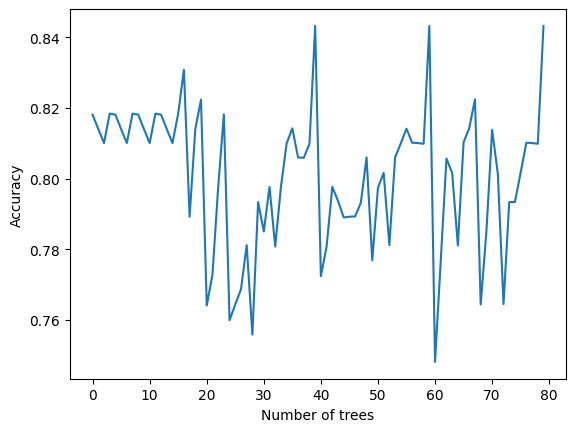

In [189]:
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
# Classification report on the training data
y_predicted_train = grid_search_forest.predict(X_train)
print(classification_report(y_train, y_predicted_train))
print("Accuracy on training data:" ,grid_search_forest.score(X_train, y_train))
# Classification report on the test data
y_predicted = grid_search_forest.predict(X_test)
print(classification_report(y_test, y_predicted))
print("Accuracy on test data:" ,grid_search_forest.score(X_test, y_test))
plt.plot(grid_search_forest.cv_results_['mean_test_score'])
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.show()



<h3>Section C: Implement a Decision Tree from Scratch for Classification. (Algorithm implementation using packages)</h3>

* <b>Implementation Of Decision Tree </b>

In [190]:
import numpy as np

class MyDecisionTree:
    def __init__(self, maxDepth=None, criterion='gini'):
        # depth can be set during initialization or by calling max_depth function later, therefore if not specified depth during the initialization, set it to None
        self.max_depth(maxDepth)
        self.maxDepth = maxDepth
        self.tree = None
        self.criterion = criterion
        # whether to use gini index or information gain

    def cost_function(self, y):
        if self.criterion == 'gini':
            classes = np.unique(y)
            gini = 1
            total_samples = len(y)
            # gini = 1 - sum of (ratio of class in the dataset)^2
            for c in classes:
                ratio = np.sum(y == c) / total_samples
                gini -= ratio ** 2
            return gini
        else:  # Using Information Gain (ID3)
            classes = np.unique(y)
            entropy = 0
            total_samples = len(y)
            # entropy = - sum of (ratio of class in the dataset) * log2(ratio of class in the dataset)
            for c in classes:
                ratio = np.sum(y == c) / total_samples
                entropy -= ratio * np.log2(ratio)
            return entropy

    def make_split(self, X, y):
        if self.criterion == 'gini':
            # Gini index calculation
            best_feature = None
            best_value = None
            best_gain = 0
            initial_cost = self.cost_function(y)
            # find the initial gini index of the dataset and intialize the best gain to 0

            for feature in range(X.shape[1]):
                feature_values = np.unique(X[:, feature])
                # for each feature, find the unique values, and then find the best split
                for value in feature_values:
                    left_data = X[:, feature] <= value
                    # feature values less than or equal to the threshold value is in the left side
                    right_data = X[:, feature] > value
                    # feature values greater than the threshold value is in the right side

                    left_y = y[left_data]
                    right_y = y[right_data]

                    if len(left_y) > 0 and len(right_y) > 0:
                        left_cost = self.cost_function(left_y)
                        # find the gini index of the left side using the cost function
                        right_cost = self.cost_function(right_y)
                        # find the gini index of the right side using the cost function

                        ratio_left = len(left_y) / len(y)
                        ratio_right = len(right_y) / len(y)
                        if(ratio_left==0 or ratio_right==0):
                            split_gain=0
                        else:
                            split_gain = initial_cost - (ratio_left * left_cost + ratio_right * right_cost)
                            # Gini index gain = Gini index before split - Gini index after split
                        if split_gain > best_gain:
                            # if the split gain is greater than the best gain, update the best gain, feature and value associated with it
                            best_gain = split_gain
                            best_feature = feature
                            best_value = value

            return best_feature, best_value

        else:  
            # Information Gain (ID3)
            best_feature = None
            best_value = None
            best_gain = 0
            initial_cost = self.cost_function(y)

            for feature in range(X.shape[1]):
                feature_values = np.unique(X[:, feature])
                for value in feature_values:
                    gain = self.information_gain(X, y, feature, value)
                    # IG(X) > 0, split is preferred
                    if gain > best_gain:
                        best_gain = gain
                        best_feature = feature
                        best_value = value
                        # update the best gain, feature and value associated with it

            return best_feature, best_value

    def information_gain(self, X, y, feature, value):
        entropy_before_split = self.cost_function(y)

        left_data = X[:, feature] <= value
        # feature values less than or equal to the threshold value is in the left side 
        right_data = X[:, feature] > value
        # feature values greater than the threshold value is in the right side

        left_y = y[left_data]
        right_y = y[right_data]
        if len(left_y)==0:
            left_entropy=0
            # no entropy if there is no data in the left side
        else:
            left_entropy = self.cost_function(left_y) 
            # find the entropy of the left side using the cost function
        if len(right_y)==0:
            right_entropy=0
            # no entropy if there is no data in the right side
        else:
            right_entropy = self.cost_function(right_y)
            # find the entropy of the right side using the cost function
            
        total_samples = len(y)
        left_ratio = len(left_y) / total_samples
        right_ratio = len(right_y) / total_samples

        entropy_after_split = left_ratio * left_entropy + right_ratio * right_entropy
        # H(S|A)=p1H(S1)+p2H(S2)
        information_gain = entropy_before_split - entropy_after_split
        # I(S,A)=H(S)-H(S|A)
        return information_gain
    def max_depth(self, depth):
        self.maxDepth = depth
 
    def grow_tree(self, X, y, depth=0):
        if len(np.unique(y)) == 1 or (self.maxDepth is not None and depth == self.maxDepth):
            return np.bincount(y).argmax()  # Return the most common class in leaf node
        # finding the best feature and value to split the data using the make_split function
        best_feature, best_value = self.make_split(X, y)
        # if there are no features to split, return the most common class in leaf node
        if best_feature is None:
            return np.bincount(y).argmax() 
        left_data = X[:, best_feature] <= best_value
        right_data = X[:, best_feature] > best_value
        # feature values less than or equal to the threshold value is in the left side
        # feature values greater than the threshold value is in the right side
        left_tree = self.grow_tree(X[left_data], y[left_data], depth + 1)
        right_tree = self.grow_tree(X[right_data], y[right_data], depth + 1)
        # recursively grow the tree until the max depth is reached
        # return the best feature, value and the left and right tree for each node
        return [best_feature, best_value, left_tree, right_tree]

    def fit(self, X, y):
        X=np.array(X)
        y=np.array(y)
        self.tree = self.grow_tree(X, y)
    
    def predict_tree(self, tree, x):
        if not isinstance(tree, list):
            return tree

        feature, value, left_tree, right_tree = tree
        # each node has a feature, value and the left and right tree associated with it by the grow_tree function
        if x[feature] <= value:
            return self.predict_tree(left_tree, x)
        # if the feature value is less than or equal to the threshold value, go to the left tree
        else:
            return self.predict_tree(right_tree, x)
        # if the feature value is greater than the threshold value, go to the right tree

    def predict(self, X):
        X=np.array(X)
        predictions = [self.predict_tree(self.tree, x) for x in X]
        # stores the predicted trees in a list of all the features
        return np.array(predictions)

    def score(self, y_true, y_pred,metric='mean_error'):
        y_true=np.array(y_true)
        y_pred=np.array(y_pred)
        if(metric=='mean_error'):
            return np.mean(y_true == y_pred)
        elif(metric=='mean_squared_error'):
            return np.mean((y_true - y_pred) ** 2)


* <b> Demonstration of the effectiveness of MyDecision-
Tree class by training and evaluating it on the given dataset. </b>

In [191]:
import numpy as np
import pandas as pd
data=pd.read_csv("thyroid.csv")
# specify the path of the dataset file, in my case it is in the same folder as the code file therefore I have just specified the file name
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,label
0,41,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,0,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102.0,f,0.00,f,0.0,f,0,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,0,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175.0,f,0.00,f,0.0,f,0,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,0,SVI,negative


* <b> Encode the data set to numerical values using LabelEncoder </b>

In [192]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for x in data.columns:
    data[x]=enc.fit_transform(data[x])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   age                        2800 non-null   int64
 1   sex                        2800 non-null   int32
 2   on thyroxine               2800 non-null   int32
 3   query on thyroxine         2800 non-null   int32
 4   on antithyroid medication  2800 non-null   int32
 5   sick                       2800 non-null   int32
 6   pregnant                   2800 non-null   int32
 7   thyroid surgery            2800 non-null   int32
 8   I131 treatment             2800 non-null   int32
 9   query hypothyroid          2800 non-null   int32
 10  query hyperthyroid         2800 non-null   int32
 11  lithium                    2800 non-null   int32
 12  goitre                     2800 non-null   int32
 13  tumor                      2800 non-null   int32
 14  hypopituitary           

In [193]:
data.head()
# encoded data set

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,label
0,39,1,0,0,0,0,0,0,0,0,...,1,109,1,69,1,89,0,0,1,3
1,21,1,0,0,0,0,0,0,0,0,...,1,86,0,0,0,0,0,0,4,3
2,44,2,0,0,0,0,0,0,0,0,...,1,93,1,45,1,100,0,0,4,3
3,68,1,1,0,0,0,0,0,0,0,...,1,159,0,0,0,0,0,0,4,3
4,68,1,0,0,0,0,0,0,0,0,...,1,45,1,41,1,50,0,0,3,3


* <b> Drop duplicate rows from data set </b>

In [194]:
data=data.drop_duplicates()
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2753 entries, 0 to 2799
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   age                        2753 non-null   int64
 1   sex                        2753 non-null   int32
 2   on thyroxine               2753 non-null   int32
 3   query on thyroxine         2753 non-null   int32
 4   on antithyroid medication  2753 non-null   int32
 5   sick                       2753 non-null   int32
 6   pregnant                   2753 non-null   int32
 7   thyroid surgery            2753 non-null   int32
 8   I131 treatment             2753 non-null   int32
 9   query hypothyroid          2753 non-null   int32
 10  query hyperthyroid         2753 non-null   int32
 11  lithium                    2753 non-null   int32
 12  goitre                     2753 non-null   int32
 13  tumor                      2753 non-null   int32
 14  hypopituitary              27

In [195]:
data.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,label
count,2753.000000,2753.000000,2753.000000,2753.000000,2753.000000,2753.000000,2753.000000,2753.000000,2753.000000,2753.000000,...,2753.000000,2753.000000,2753.000000,2753.000000,2753.000000,2753.000000,2753.0,2753.0,2753.000000,2753.000000
mean,49.829277,1.272067,0.119869,0.014530,0.011987,0.039956,0.014893,0.014166,0.017436,0.059208,...,0.950236,88.186705,0.909190,49.332728,0.909916,82.318198,0.0,0.0,3.265529,2.963676
std,19.028301,0.526625,0.324868,0.119682,0.108846,0.195892,0.121146,0.118198,0.130911,0.236057,...,0.217496,37.867473,0.287391,24.056462,0.286353,38.481125,0.0,0.0,1.101812,0.239888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,69.000000,1.000000,38.000000,1.000000,68.000000,0.0,0.0,3.000000,3.000000
50%,53.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,86.000000,1.000000,51.000000,1.000000,84.000000,0.0,0.0,4.000000,3.000000
75%,65.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,108.000000,1.000000,62.000000,1.000000,102.000000,0.0,0.0,4.000000,3.000000
max,93.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,217.000000,1.000000,138.000000,1.000000,209.000000,0.0,0.0,4.000000,3.000000


* <b>Split the data set into training and testing </b>

In [196]:
Y=data['label']
X=data.drop(['label'],axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(X,Y,test_size=0.2,random_state=42)
# split the data set into training and testing sets

* <b> Gini Index Decision Tree</b>

In [197]:
tree = MyDecisionTree(maxDepth=5,criterion='gini')
tree.fit(xtrain, ytrain)

# Make predictions
predictions = tree.predict(xtest)

# Calculate accuracy using mean squared error metric, less the error better the accuracy
error = tree.score(ytest, predictions,metric='mean_squared_error')
# calculate the accuracy of the model using mean error metric , more the accuracy better the model
accuracy = tree.score(ytest, predictions,metric='mean_error')
print("Accuracy using Mean:", accuracy)
print("Error using MSE:", error)

Accuracy using Mean: 0.9909255898366606
Error using MSE: 0.025408348457350273


* <b> Information Gain Decision Tree </b>

In [198]:
treeID3 = MyDecisionTree(maxDepth=5,criterion='information_gain')
treeID3.fit(xtrain, ytrain)

# Make predictions
predictions = treeID3.predict(xtest)

# Calculate accuracy using mean squared error metric, less the error better the accuracy
error = treeID3.score(ytest, predictions,metric='mean_squared_error')
# calculate the accuracy of the model using mean error metric , more the accuracy better the model
accuracy = treeID3.score(ytest, predictions,metric='mean_error')
print("Accuracy using Mean:", accuracy)
print("Error using MSE:", error)

Accuracy using Mean: 0.9909255898366606
Error using MSE: 0.025408348457350273
